## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25    0x2  CgriaT22lMu93Fhphc                    SF   
1  192.168.10.25    0x3  CtDLky2wbX7FyzSxB9                    SF   
2  192.168.10.25   0xe1   CUXL5jeoJPIB27mo8                    SF   
3  192.168.10.25   0xf5  Cgssxu18WI9tjIX9Sb                    SF   
4  192.168.10.25  0x238  CARo4Q16nPAJQtEhy6                    SH   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.050301                   1244                      5216   
1             0.050370                   1244                      5216   
2           194.709021                   3128                      5532   
3             0.030972                     62                       118   
4             0.000000                      0                        89   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              50083                    52              tcp  ...   
1              50177                    52              tcp  ...   
2              50108                    46              tcp  ...   
3              65037                     2              udp  ...   
4              50127                     1              tcp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25       0x2  CgriaT22lMu93Fhphc                    SF   
1      192.168.10.25       0x3  CtDLky2wbX7FyzSxB9                    SF   
2      192.168.10.25      0xe1   CUXL5jeoJPIB27mo8                    SF   
3      192.168.10.25      0xf5  Cgssxu18WI9tjIX9Sb                    SF   
4      192.168.10.25     0x238  CARo4Q16nPAJQtEhy6                    SH   
...              ...       ...                 ...                   ...   
17903     172.16.0.1  0x293483  CQYOKJ38aHE7YTnpU9                    SF   
17904     172.16.0.1  0x2c4032  CEQqcz3XgFIfX2oPK6                    SF   
17905     172.16.0.1  0x2dc912   CSk1NvFE0SvT8MrUd                    SF   
17906     172.16.0.1  0x2dc938  CReVrQ3aFuUEbEbiL4                    SF   
17907     172.16.0.1  0x2f4d86  CFyggt441hUjfO2CWl                    SF   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 0.050301                   1244                      5216   
1                 0.050370                   1244                      5216   
2               194.709021                   3128                      5532   
3                 0.030972                     62                       118   
4                 0.000000                      0                        89   
...                    ...                    ...                       ...   
17903             5.006652                    599                       867   
17904             0.231767                      0                       216   
17905             5.039260                    537                       805   
17906             5.007612                    537                       857   
17907             5.001561                      0                       216   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  50083                    52              tcp   
1                  50177                    52              tcp   
2                  50108                    46              tcp   
3                  65037                     2              udp   
4                  50127                     1              tcp   
...                  ...                   ...              ...   
17903              36204                     5              tcp   
17904              36178                     4              tcp   
17905              36200                     5              tcp   
17906              36210                     6              tcp   
17907              36186                     4              tcp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                       1588                      4648                139   
1                       1588                      4648                139   
2                      60386                     62994                443   
3                         94                       150                 53   
4                          0                         0                443   
...                      ...                       ...                ...   
17903                   2021                      2289                 80   
17904                      0                       112                 80   
17905                   1881                      2149                 80   
17906                   1881                      2097                 80   
17907                      0                       112                 80   

       connection.resp_pkts  connection.service                connection.ts  \
0                        28  gssapi,smb,dce_rpc  2017-07-06T13:35:16.061794Z   
1                        28  gssapi,smb,dce_rpc  2017-07-06T14:02:17.855831Z   
2                        50                 ssl  2017-07-06T13:36:31.772798Z   
3                         2                 dns  2017-07-06T13:38:32.003958Z   
4              

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     17874
Yes       34
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.001899
1    No              0.998101

<AxesSubplot:xlabel='Class'>

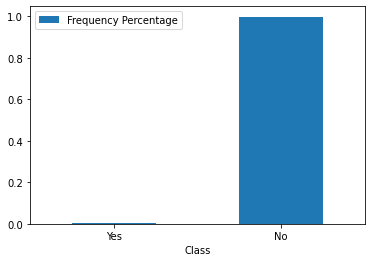

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
connection.orig_bytes                            0
connection.orig_ip_bytes                         0
connection.orig_p                                0
connection.orig_pkts                             0
connection.proto                                 0
connection.resp_bytes                            0
connection.resp_ip_bytes                         0
connection.resp_p                                0
connection.resp_pkts                             0
connection.service                               0
connection.ts                                    0
responded_ip                                     0
dns_count                                        0
ssh_count                                        0
http_count                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   17908
unique                                   1379
top       2017-07-06 13:37:25.949607424+00:00
freq                                      833
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25    0x2  CgriaT22lMu93Fhphc                    SF   
1  192.168.10.25    0x3  CtDLky2wbX7FyzSxB9                    SF   
2  192.168.10.25   0xe1   CUXL5jeoJPIB27mo8                    SF   
3  192.168.10.25   0xf5  Cgssxu18WI9tjIX9Sb                    SF   
4  192.168.10.25  0x238  CARo4Q16nPAJQtEhy6                    SH   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.050301                   1244                      5216   
1             0.050370                   1244                      5216   
2           194.709021                   3128                      5532   
3             0.030972                     62                       118   
4             0.000000                      0                        89   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              50083                    52              tcp   
1              50177                    52              tcp   
2              50108                    46              tcp   
3              65037                     2              udp   
4              50127                     1              tcp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                   1588                      4648                139   
1                   1588                      4648                139   
2                  60386                     62994                443   
3                     94                       150                 53   
4                      0                         0                443   

   connection.resp_pkts  connection.service                connection.ts  \
0                    28  gssapi,smb,dce_rpc  2017-07-06T13:35:16.061794Z   
1                    28  gssapi,smb,dce_rpc  2017-07-06T14:02:17.855831Z   
2                    50                 ssl  2017-07-06T13:36:31.772798Z   
3                     2                 dns  2017-07-06T13:38:32.003958Z   
4                     0                none  2017-07-06T13:39:53.447605Z   

    responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0  192.168.10.19          0          0           0          0            0   
1  192.168.10.19          0          0           0          0            0   
2  172.217.10.10          0          0           0          1            3   
3   192.168.10.3          1          0           0          0            0   
4   52.20.233.27          0          0           0          0            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3       [1]    [None]                []           []          []   
4        []        []                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []          []   
1               []              []          []   
2               []              []  ['TLSv10']   
3               []              []          []   
4               []              []          []   

                         ssl_cipher ssl_curve ssl_validation_status  \
0                                []        []                    []   
1                                []        []                    []   
2  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
3                                []        []                    []   
4                                []        []                    []   

  files_source                                           file_md5  \
0           []                                                 []   
1           []                                                 []   
2      ['SSL']  ['2e7db2a31d0e3da4b25f49b9542a2e1

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip   responded_ip  connection.time  \
0  CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1  CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2   CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3  Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4  CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.050301              50083                   1244   
1             0.050370              50177                   1244   
2           194.709021              50108                   3128   
3             0.030972              65037                     62   
4             0.000000              50127                      0   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      5216                    52                139   
1                      5216                    52                139   
2                      5532                    46                443   
3                       118                     2                 53   
4                        89                     1                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   1588                      4648                    28   
1                   1588                      4648                    28   
2                  60386                     62994                    50   
3                     94                       150                     2   
4                      0                         0                     0   

  connection.proto  connection.service connection.conn_state  dns_count  \
0              tcp  gssapi,smb,dce_rpc                    SF          0   
1              tcp  gssapi,smb,dce_rpc                    SF          0   
2              tcp                 ssl                    SF          0   
3              udp                 dns                    SF          1   
4              tcp                none                    SH          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              115   
1          0           0          0            0               31   
2          0           0          1            3              129   
3          0           0          0            0              135   
4          0           0          0            0              142   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499348e+09                           77.845718   
1                    1.499350e+09                            6.012052   
2                    1.499348e+09                           71.086874   
3                    1.499348e+09                           67.927811   
4                    1.499348e+09                           64.579782   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            15.617391                           1269.843478   
1                             9.806452                            444.967742   
2                            15.077519                           1185.682171   
3                            14.451852                           1133.696296   
4                            14.309859                           1111.260563   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          13885.930435                            13.782609   
1                            706.483871                             4.612903   
2                          12475.922481                            12.852713   
3                          11922.148148                            12.296296   
4                          11346.830986                            11.908451   

  orig_o

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip   responded_ip  connection.time  \
0  CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1  CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2   CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3  Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4  CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.050301              50083                   1244   
1             0.050370              50177                   1244   
2           194.709021              50108                   3128   
3             0.030972              65037                     62   
4             0.000000              50127                      0   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      5216                    52                139   
1                      5216                    52                139   
2                      5532                    46                443   
3                       118                     2                 53   
4                        89                     1                443   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   1588                      4648                    28   
1                   1588                      4648                    28   
2                  60386                     62994                    50   
3                     94                       150                     2   
4                      0                         0                     0   

  connection.proto  connection.service connection.conn_state  dns_count  \
0              tcp  gssapi,smb,dce_rpc                    SF          0   
1              tcp  gssapi,smb,dce_rpc                    SF          0   
2              tcp                 ssl                    SF          0   
3              udp                 dns                    SF          1   
4              tcp                none                    SH          0   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              115   
1          0           0          0            0               31   
2          0           0          1            3              129   
3          0           0          0            0              135   
4          0           0          0            0              142   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499348e+09                           77.845718   
1                    1.499350e+09                            6.012052   
2                    1.499348e+09                           71.086874   
3                    1.499348e+09                           67.927811   
4                    1.499348e+09                           64.579782   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            15.617391                           1269.843478   
1                             9.806452                            444.967742   
2                            15.077519                           1185.682171   
3                            14.451852                           1133.696296   
4                            14.309859                           1111.260563   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          13885.930435                            13.782609   
1                            706.483871                             4.612903   
2                          12475.922481                            12.852713   
3                          11922.148148                            12.296296   
4                          11346.830986                            11.908451   

  orig_o

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_tcp', 'connection.proto_udp'], dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/ohe_proto_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_gssapi,ntlm,smb',
       'connection.service_gssapi,smb,dce_rpc',
       'connection.service_gssapi,smb,krb', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_ssh', 'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/ohe_service_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_S0', 'connection.conn_state_S1',
       'connection.conn_state_SF', 'connection.conn_state_SH',
       'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp'], dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_S0', 'orig_orig_connection.conn_state_mode_SF'], dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_ftp',
       'orig_resp_connection.service_mode_http',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_SF'], dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-', 'resp_orig_connection.protocol_mode_udp'], dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_ntp'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_S0',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_tcp', 'resp_resp_connection.protocol_mode_udp'], dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_ftp',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mo

In [32]:
selected_df

connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_http', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ntp', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_S0', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_ftp', 'orig_resp_connection.service_mode_http', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_SF']
RESP_ORIG_OHE_CAT_COLS = ['resp_orig_connection.protocol_mode_-', 'resp_orig_connection.protocol_mode_udp', 'resp_or

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     1.790800e+04         17908.000000        17908.00000   
mean      1.499349e+09            16.473037        51172.11319   
std       4.714971e+02            47.329563        16030.87421   
min       1.499348e+09             0.000000           42.00000   
25%       1.499348e+09             0.000535        50427.75000   
50%       1.499349e+09             0.038696        55929.50000   
75%       1.499349e+09             1.327264        61184.00000   
max       1.499350e+09          1196.986621        65534.00000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           17908.000000              17908.000000          17908.000000   
mean              530.539424                906.044394              8.438631   
std              2160.777669               3458.894236             48.831306   
min                 0.000000                  0.000000              0.000000   
25%                58.000000                114.000000              2.000000   
50%                80.000000                140.000000              2.000000   
75%               366.250000                730.000000              8.000000   
max            142650.000000             150185.000000           3317.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       17908.000000           1.790800e+04              1.790800e+04   
mean          218.981182           8.225862e+03              8.642102e+03   
std          1977.838727           1.253319e+05              1.279636e+05   
min            21.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.160000e+02              1.640000e+02   
50%            53.000000           2.040000e+02              2.600000e+02   
75%            80.000000           7.462500e+02              1.123000e+03   
max         63578.000000           8.626945e+06              8.773277e+06   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          17908.000000  17908.000000  17908.000000  17908.000000   
mean               9.136196      0.662330      0.003518      0.076167   
std               66.185314      0.472929      0.059210      0.265273   
min                0.000000      0.000000      0.000000      0.000000   
25%                2.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%                6.000000      1.000000      0.000000      0.000000   
max             3658.000000      1.000000      1.000000      1.000000   

          ssl_count   files_count  orig_orig_total  \
count  17908.000000  17908.000000     17908.000000   
mean       0.186788      0.546460      1020.397364   
std        0.389752      1.489269       603.399036   
min        0.000000      0.000000         3.000000   
25%        0.000000      0.000000       473.000000   
50%        0.000000      0.000000      1034.000000   
75%        0.000000      0.000000      1444.000000   
max        1.000000     36.000000      2228.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    1.790800e+04                        17908.000000   
mean                     1.499349e+09                           16.323386   
std                      4.430677e+02                           10.724557   
min                      1.499348e+09                            0.013151   
25%                      1.499348e+09                            8.284330   
50%                      1.499349e+09                           19.443121   
75%                      1.499349e+09                           21.656750   
max                      1.499350e+09                           77.845718   

       orig_orig_connection.orig_pkts_mean  \
count                         17908.000000   
mean                              8.423248   
std                 

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.043615          0.500262        -1.623122   
1               0.043615          0.500262         1.816643   
2               0.043615          0.125157        -1.462542   
3               0.043615          0.500262        -1.207536   
4               0.043615         -2.161730        -1.034797   
...                  ...               ...              ...   
17903         -22.928277          0.500262        -0.878168   
17904         -22.928277          0.500262        -1.612417   
17905         -22.928277          0.500262        -0.974187   
17906         -22.928277          0.500262        -0.795040   
17907         -22.928277          0.500262        -1.585497   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.346997          -0.067940               0.330196   
1                -0.346995          -0.062077               0.330196   
2                 3.765954          -0.066381               1.202129   
3                -0.347405           0.864911              -0.216844   
4                -0.348059          -0.065196              -0.245539   
...                    ...                ...                    ...   
17903            -0.242274          -0.933731               0.031684   
17904            -0.343162          -0.935353              -0.245539   
17905            -0.241585          -0.933981               0.002990   
17906            -0.242253          -0.933357               0.002990   
17907            -0.242381          -0.934854              -0.245539   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1.246085              0.892104          -0.040440   
1                      1.246085              0.892104          -0.040440   
2                      1.337446              0.769228           0.113268   
3                     -0.227838             -0.131858          -0.083923   
4                     -0.236222             -0.152337           0.113268   
...                         ...                   ...                ...   
17903                 -0.011288             -0.070421          -0.070271   
17904                 -0.199504             -0.090900          -0.070271   
17905                 -0.029214             -0.070421          -0.070271   
17906                 -0.014180             -0.049941          -0.070271   
17907                 -0.199504             -0.090900          -0.070271   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.052964                 -0.031214              0.285023   
1                  -0.052964                 -0.031214              0.285023   
2                   0.416188                  0.424757              0.617432   
3                  -0.064884                 -0.066365             -0.107824   
4                  -0.065634                 -0.067537             -0.138043   
...                      ...                       ...                   ...   
17903              -0.049509                 -0.049649             -0.062496   
17904              -0.065634                 -0.066662             -0.107824   
17905              -0.050626                 -0.050743             -0.062496   
17906              -0.050626                 -0.051150             -0.077605   
17907              -0.065634                 -0.066662             -0.107824   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.400524  -0.059417   -0.287136  -0.479262    -0.366942   
1      -1.400524  -0.059417   -0.287136  -0.479262    -0.366942   
2      -1.400524  -0.059417   -0.287136   2.086543     1.647525   
3       0.714018  -0.059417   -0.287136  -0.479262    -0.366942   
4      -1.400524  -0.059417   -0.287136  -0.479262    -0.366942   
...          ...        ...         ...        ...          ...   
17903  -1.400524  -0.059417    3.482676  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2         3         4         5         6    \
0      1.0  0.750699  0.008921  0.000042  0.764078  0.008721  0.034730   
1      1.0  0.750699  0.910392  0.000042  0.765513  0.008721  0.034730   
2      1.0  0.672739  0.051005  0.162666  0.764460  0.021928  0.036835   
3      1.0  0.750699  0.117835  0.000026  0.992411  0.000435  0.000786   
4      1.0  0.197441  0.163105  0.000000  0.764750  0.000000  0.000593   
...    ...       ...       ...       ...       ...       ...       ...   
17903  0.0  0.750699  0.204154  0.004183  0.552159  0.004199  0.005773   
17904  0.0  0.750699  0.011727  0.000194  0.551762  0.000000  0.001438   
17905  0.0  0.750699  0.178990  0.004210  0.552098  0.003764  0.005360   
17906  0.0  0.750699  0.225939  0.004184  0.552251  0.003764  0.005706   
17907  0.0  0.750699  0.018781  0.004178  0.551884  0.000000  0.001438   

            7         8         9         10        11   12   13   14   15   \
0      0.015677  0.001857  0.000184  0.000530  0.007654  0.0  0.0  0.0  0.0   
1      0.015677  0.001857  0.000184  0.000530  0.007654  0.0  0.0  0.0  0.0   
2      0.013868  0.006640  0.007000  0.007180  0.013669  0.0  0.0  0.0  1.0   
3      0.000603  0.000503  0.000011  0.000017  0.000547  1.0  0.0  0.0  0.0   
4      0.000301  0.006640  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
17903  0.001507  0.000928  0.000234  0.000261  0.001367  0.0  0.0  1.0  0.0   
17904  0.001206  0.000928  0.000000  0.000013  0.000547  0.0  0.0  0.0  0.0   
17905  0.001507  0.000928  0.000218  0.000245  0.001367  0.0  0.0  1.0  0.0   
17906  0.001809  0.000928  0.000218  0.000239  0.001093  0.0  0.0  1.0  0.0   
17907  0.001206  0.000928  0.000000  0.000013  0.000547  0.0  0.0  0.0  0.0   

            16        17        18        19        20        21        22   \
0      0.000000  0.050337  0.065464  1.000000  0.331894  0.572382  0.149969   
1      0.000000  0.012584  0.908465  0.077074  0.199294  0.183252  0.007335   
2      0.083333  0.056629  0.079646  0.913162  0.319575  0.532680  0.134709   
3      0.000000  0.059326  0.087177  0.872574  0.305298  0.508156  0.128716   
4      0.000000  0.062472  0.098310  0.829558  0.302058  0.497572  0.122489   
...         ...       ...       ...       ...       ...       ...       ...   
17903  0.027778  0.004045  0.213575  0.064374  0.102927  0.234216  0.024050   
17904  0.000000  0.009438  0.014234  0.060752  0.144762  0.412987  0.037213   
17905  0.027778  0.006742  0.146353  0.061893  0.114970  0.278402  0.027359   
17906  0.027778  0.004045  0.213575  0.064374  0.102927  0.234216  0.024050   
17907  0.000000  0.010337  0.027057  0.061070  0.141397  0.399798  0.036836   

            23        24        25   26   27        28        29        30   \
0      0.200320  0.116667  0.048474  0.0  0.0  0.018935  0.001866  0.090909   
1      0.061223  0.150000  0.009874  0.0  0.0  0.003550  0.000000  0.127273   
2      0.186214  0.166667  0.053411  0.0  0.0  0.019527  0.001866  0.109091   
3      0.177773  0.200000  0.055206  0.0  0.0  0.019527  0.001866  0.145455   
4      0.171890  0.233333  0.057451  0.0  0.0  0.019527  0.001866  0.163636   
...         ...       ...       ...  ...  ...       ...       ...       ...   
17903  0.065830  0.000000  0.005386  0.0  0.0  0.000000  0.022388  0.000000   
17904  0.058878  0.000000  0.010772  0.0  0.0  0.000000  0.044776  0.000000   
17905  0.069623  0.000000  0.008079  0.0  0.0  0.000000  0.033582  0.000000   
17906  0.065830  0.000000  0.005386  0.0  0.0  0.000000  0.022388  0.000000   
17907  0.059510  0.000000  0.011670  0.0  0.0  0.000000  0.048507  0.000000   

            31   32        33   34   35        36   37        38        39   \
0      0.123340  0.0  0.476190  0.2  0.0  0.330667  0.0  0.008696  0.873657   
1      0.007590  0.0  0.476190  0.4  0.0  0.451930  0.0  0.000000  0.159393   
2      0.132827  0.0  0.761905  0.

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.750699         0.008921   
1                    1.0          0.750699         0.910392   
2                    1.0          0.672739         0.051005   
3                    1.0          0.750699         0.117835   
4                    1.0          0.197441         0.163105   
...                  ...               ...              ...   
17903                0.0          0.750699         0.204154   
17904                0.0          0.750699         0.011727   
17905                0.0          0.750699         0.178990   
17906                0.0          0.750699         0.225939   
17907                0.0          0.750699         0.018781   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000042           0.764078               0.008721   
1                 0.000042           0.765513               0.008721   
2                 0.162666           0.764460               0.021928   
3                 0.000026           0.992411               0.000435   
4                 0.000000           0.764750               0.000000   
...                    ...                ...                    ...   
17903             0.004183           0.552159               0.004199   
17904             0.000194           0.551762               0.000000   
17905             0.004210           0.552098               0.003764   
17906             0.004184           0.552251               0.003764   
17907             0.004178           0.551884               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.034730              0.015677           0.001857   
1                      0.034730              0.015677           0.001857   
2                      0.036835              0.013868           0.006640   
3                      0.000786              0.000603           0.000503   
4                      0.000593              0.000301           0.006640   
...                         ...                   ...                ...   
17903                  0.005773              0.001507           0.000928   
17904                  0.001438              0.001206           0.000928   
17905                  0.005360              0.001507           0.000928   
17906                  0.005706              0.001809           0.000928   
17907                  0.001438              0.001206           0.000928   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000184                  0.000530              0.007654   
1                   0.000184                  0.000530              0.007654   
2                   0.007000                  0.007180              0.013669   
3                   0.000011                  0.000017              0.000547   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
17903               0.000234                  0.000261              0.001367   
17904               0.000000                  0.000013              0.000547   
17905               0.000218                  0.000245              0.001367   
17906               0.000218                  0.000239              0.001093   
17907               0.000000                  0.000013              0.000547   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.083333   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
17903        0.0        0.0         1.0   

In [41]:
selected_df

connection.uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.050301              50083                   1244   
1                 0.050370              50177                   1244   
2               194.709021              50108                   3128   
3                 0.030972              65037                     62   
4                 0.000000              50127                      0   
...                    ...                ...                    ...   
17903             5.006652              36204                    599   
17904             0.231767              36178                      0   
17905             5.039260              36200                    537   
17906             5.007612              36210                    537   
17907             5.001561              36186                      0   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          5216                    52                139   
1                          5216                    52                139   
2                          5532                    46                443   
3                           118                     2                 53   
4                            89                     1                443   
...                         ...                   ...                ...   
17903                       867                     5                 80   
17904                       216                     4                 80   
17905                       805                     5                 80   
17906                       857                     6                 80   
17907                       216                     4                 80   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       1588                      4648                    28   
1                       1588                      4648                    28   
2                      60386                     62994                    50   
3                         94                       150                     2   
4                          0                         0                     0   
...                      ...                       ...                   ...   
17903                   2021                      2289                     5   
17904                      0                       112                     2   
17905                   1881                      2149                     5   
17906                   1881                      2097                     4   
17907                      0                       112                     2   

      connection.proto  connection.service connection.conn_state  dns_count  \
0                  tcp  gssapi,smb,dce_rpc                    SF          0   
1                  tcp  gssapi,smb,dce_rpc                    SF          0   
2                  tcp                 ssl                    SF          0   
3                  udp                 dns 

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   
...                           ...                         ...   
17903                           1                           0   
17904                           1                           0   
17905                           1                           0   
17906                           1                           0   
17907                           1                           0   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
17903                    0                   0                   0   
17904                    0                   0                   0   
17905                    0                   0                   0   
17906                    0                   0                   0   
17907                    0                   0                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   1                   0   
4                        1                   0                   0   
...                    ...                 ...                 ...   
17903                    0                   0                   1   
17904                    0                   0                   1   
17905                    0                   0                   1   
17906                    0                   0                   1   
17907                    0                   0                   1   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           1   
1                        0                    0                           1   
2                        0                    0                           0   
3                        0                    0                           0   
4                        0                    0                           0   
...                    ...                  ...                         ...   
17903                    0                    0                           0   
17904                    0                    0                           0   
17905                    0                    0                           0   
17906                    0                    0                           0   
17907                    0                    0                           0   

       connection.proto_tcp  connection.proto_udp  connection.service_dce_rpc  \
0                         1                     0                           0   
1                         1                     0                           0   
2                         1                     0                           0   
3                         0                     1                           0   
4                         1                     0                           0   
...                     ...                   ...                         ...   
17903                     1 

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip   responded_ip  connection.time  \
0      CgriaT22lMu93Fhphc  192.168.10.25  192.168.10.19     1.499348e+09   
1      CtDLky2wbX7FyzSxB9  192.168.10.25  192.168.10.19     1.499350e+09   
2       CUXL5jeoJPIB27mo8  192.168.10.25  172.217.10.10     1.499348e+09   
3      Cgssxu18WI9tjIX9Sb  192.168.10.25   192.168.10.3     1.499348e+09   
4      CARo4Q16nPAJQtEhy6  192.168.10.25   52.20.233.27     1.499348e+09   
...                   ...            ...            ...              ...   
17903  CQYOKJ38aHE7YTnpU9     172.16.0.1  192.168.10.50     1.499348e+09   
17904  CEQqcz3XgFIfX2oPK6     172.16.0.1  192.168.10.50     1.499348e+09   
17905   CSk1NvFE0SvT8MrUd     172.16.0.1  192.168.10.50     1.499348e+09   
17906  CReVrQ3aFuUEbEbiL4     172.16.0.1  192.168.10.50     1.499349e+09   
17907  CFyggt441hUjfO2CWl     172.16.0.1  192.168.10.50     1.499348e+09   

         duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0        0.050301   50083     1244        5216                    52     139   
1        0.050370   50177     1244        5216                    52     139   
2      194.709021   50108     3128        5532                    46     443   
3        0.030972   65037       62         118                     2      53   
4        0.000000   50127        0          89                     1     443   
...           ...     ...      ...         ...                   ...     ...   
17903    5.006652   36204      599         867                     5      80   
17904    0.231767   36178        0         216                     4      80   
17905    5.039260   36200      537         805                     5      80   
17906    5.007612   36210      537         857                     6      80   
17907    5.001561   36186        0         216                     4      80   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol             service  \
0         1588        4648                    28      tcp  gssapi,smb,dce_rpc   
1         1588        4648                    28      tcp  gssapi,smb,dce_rpc   
2        60386       62994                    50      tcp                 ssl   
3           94         150                     2      udp                 dns   
4            0           0                     0      tcp                none   
...        ...         ...                   ...      ...                 ...   
17903     2021        2289                     5      tcp                http   
17904        0         112                     2      tcp                none   
17905     1881        2149                     5      tcp                http   
17906     1881        2097                     4      tcp                http   
17907        0         112                     2      tcp                none   

      conn_state       orig_p_cat       resp_p_cat attacker_label  \
0             SF  orig_reg_or_dyn  resp_well_known             No   
1             SF  orig_reg_or_dyn  resp_well_known             No   
2             SF  orig_reg_or_dyn         resp_443             No   
3             SF  orig_reg_or_dyn          resp_53             No   
4             SH  orig_reg_or_dyn         resp_443             No   
...          ...              ...              ...            ...   
17903         SF  orig_reg_or_dyn          resp_80            Yes   
17904         SF  orig_reg_or_dyn          resp_80            Yes   
17905         SF  orig_reg_or_dyn          resp_80            Yes   
17906         SF  orig_reg_or_dyn          resp_80            Yes   
17907         SF  orig_reg_or_dyn          resp_80            Yes   

      victim_label                    timestamp  
0               No  2017-07-06T13:35:16.061794Z  
1               No  2017-07-06T14:02:17.855831Z  
2               No  2017-07-06T13:36:31.772798Z  
3               No  2017-07-06T13:38:32.003958Z  
4               No  2017-07-06T13:39:53.447605Z  
...            ...                          ..

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.750699         0.008921   
1                    1.0          0.750699         0.910392   
2                    1.0          0.672739         0.051005   
3                    1.0          0.750699         0.117835   
4                    1.0          0.197441         0.163105   
...                  ...               ...              ...   
17903                0.0          0.750699         0.204154   
17904                0.0          0.750699         0.011727   
17905                0.0          0.750699         0.178990   
17906                0.0          0.750699         0.225939   
17907                0.0          0.750699         0.018781   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000042           0.764078               0.008721   
1                 0.000042           0.765513               0.008721   
2                 0.162666           0.764460               0.021928   
3                 0.000026           0.992411               0.000435   
4                 0.000000           0.764750               0.000000   
...                    ...                ...                    ...   
17903             0.004183           0.552159               0.004199   
17904             0.000194           0.551762               0.000000   
17905             0.004210           0.552098               0.003764   
17906             0.004184           0.552251               0.003764   
17907             0.004178           0.551884               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.034730              0.015677           0.001857   
1                      0.034730              0.015677           0.001857   
2                      0.036835              0.013868           0.006640   
3                      0.000786              0.000603           0.000503   
4                      0.000593              0.000301           0.006640   
...                         ...                   ...                ...   
17903                  0.005773              0.001507           0.000928   
17904                  0.001438              0.001206           0.000928   
17905                  0.005360              0.001507           0.000928   
17906                  0.005706              0.001809           0.000928   
17907                  0.001438              0.001206           0.000928   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000184                  0.000530              0.007654   
1                   0.000184                  0.000530              0.007654   
2                   0.007000                  0.007180              0.013669   
3                   0.000011                  0.000017              0.000547   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
17903               0.000234                  0.000261              0.001367   
17904               0.000000                  0.000013              0.000547   
17905               0.000218                  0.000245              0.001367   
17906               0.000218                  0.000239              0.001093   
17907               0.000000                  0.000013              0.000547   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.083333   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
17903        0.0        0.0         1.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/preprocessed_backup_15_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

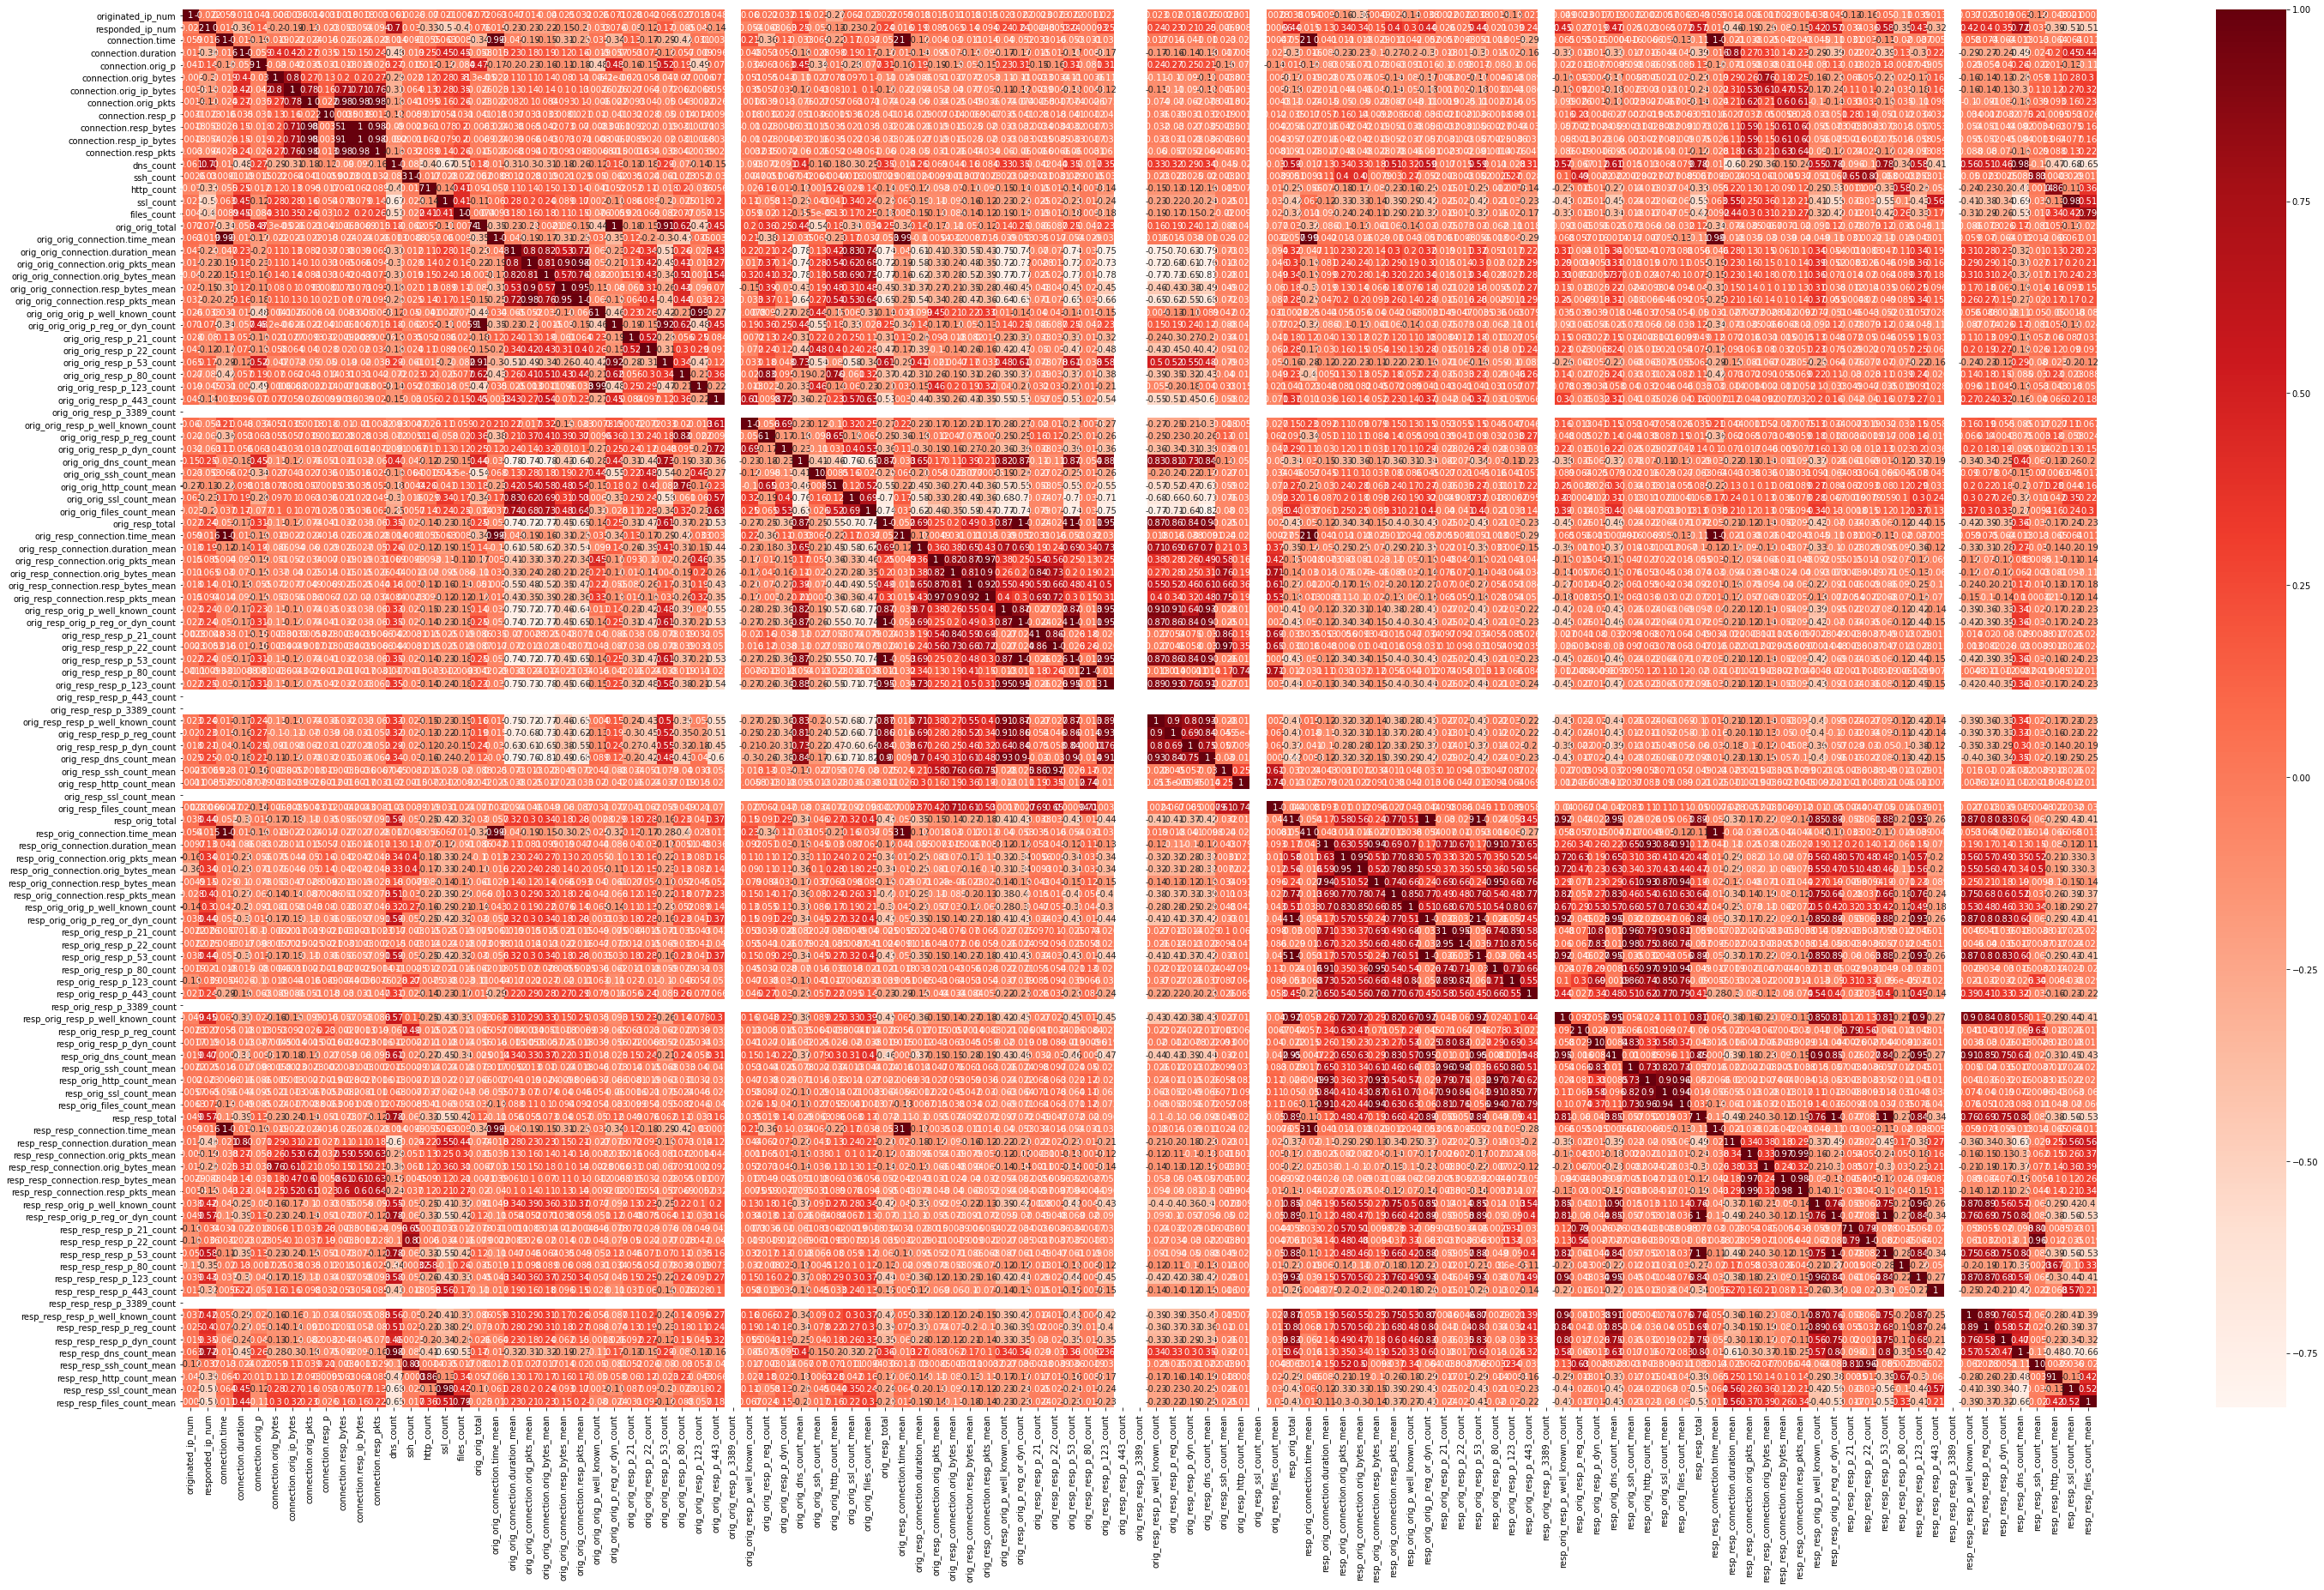

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.750699         0.008921   
1                    1.0          0.750699         0.910392   
2                    1.0          0.672739         0.051005   
3                    1.0          0.750699         0.117835   
4                    1.0          0.197441         0.163105   
...                  ...               ...              ...   
17903                0.0          0.750699         0.204154   
17904                0.0          0.750699         0.011727   
17905                0.0          0.750699         0.178990   
17906                0.0          0.750699         0.225939   
17907                0.0          0.750699         0.018781   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.000042           0.764078               0.008721   
1                 0.000042           0.765513               0.008721   
2                 0.162666           0.764460               0.021928   
3                 0.000026           0.992411               0.000435   
4                 0.000000           0.764750               0.000000   
...                    ...                ...                    ...   
17903             0.004183           0.552159               0.004199   
17904             0.000194           0.551762               0.000000   
17905             0.004210           0.552098               0.003764   
17906             0.004184           0.552251               0.003764   
17907             0.004178           0.551884               0.000000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.034730              0.015677           0.001857   
1                      0.034730              0.015677           0.001857   
2                      0.036835              0.013868           0.006640   
3                      0.000786              0.000603           0.000503   
4                      0.000593              0.000301           0.006640   
...                         ...                   ...                ...   
17903                  0.005773              0.001507           0.000928   
17904                  0.001438              0.001206           0.000928   
17905                  0.005360              0.001507           0.000928   
17906                  0.005706              0.001809           0.000928   
17907                  0.001438              0.001206           0.000928   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000184                  0.000530              0.007654   
1                   0.000184                  0.000530              0.007654   
2                   0.007000                  0.007180              0.013669   
3                   0.000011                  0.000017              0.000547   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
17903               0.000234                  0.000261              0.001367   
17904               0.000000                  0.000013              0.000547   
17905               0.000218                  0.000245              0.001367   
17906               0.000218                  0.000239              0.001093   
17907               0.000000                  0.000013              0.000547   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.083333   
3            1.0        0.0         0.0        0.0     0.000000   
4            0.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
17903        0.0        0.0         1.0   

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)